In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# weight check
curConv = nn.Conv2d(1, 1, 3)
curConv.weight

Parameter containing:
tensor([[[[-0.3027,  0.3246, -0.2589],
          [ 0.2818,  0.1136,  0.0045],
          [ 0.3065, -0.1816,  0.2726]]]], requires_grad=True)

In [105]:
class Idek(nn.Module):
    def __init__(self, num_layers):
        super().__init__()
        self.convs = []
        for i in range (num_layers):
            curConv = nn.Conv2d(1, 1, 3, bias=False)
            
            with torch.no_grad():
                curConv.weight = nn.Parameter(torch.ones_like(curConv.weight))

            self.convs.append(curConv)
    
    def forward(self, x):
        for i in range(len(self.convs)):
            x = self.convs[i](x)
        return x


tensor(1., grad_fn=<MaxBackward1>)


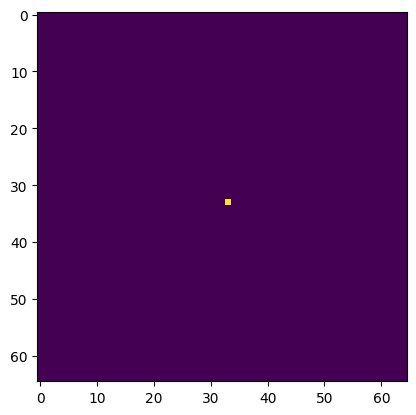

In [106]:
input_image = torch.zeros((1, 65, 65), dtype=torch.float32)
input_image[0][input_image.shape[1]//2+1][input_image.shape[1]//2+1] = 1.0
input_image.requires_grad = True
print(input_image.max())
plt.imshow(input_image.detach().permute(1, 2, 0).numpy())


In [107]:
model = Idek(2)
model.convs[0].weight

Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True)

In [108]:
output = model(input_image)
output.shape

torch.Size([1, 61, 61])

In [109]:
output.max()

tensor(9., grad_fn=<MaxBackward1>)

In [110]:
model = Idek(5)

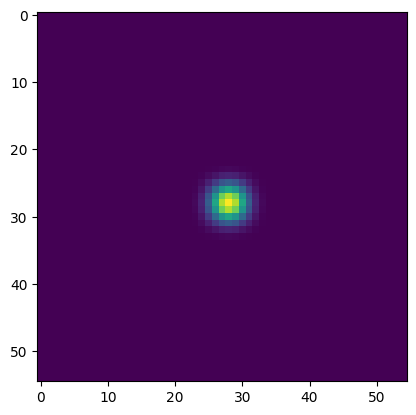

In [113]:
output = model(input_image)
output[0][output.shape[1]//2+1][output.shape[1]//2+1].backward()
input_image.grad, input_image.grad.shape
plt.imshow(output.detach().permute(1,2,0).numpy())

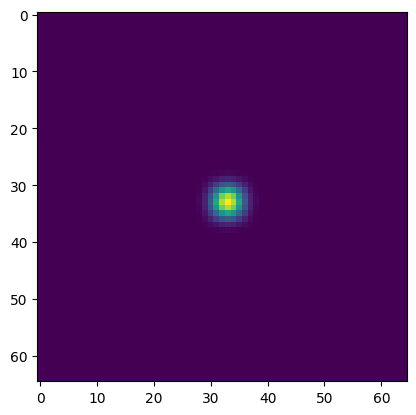

In [114]:
plt.imshow(input_image.grad.permute(1, 2, 0).numpy())